### Importing Packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from tqdm import tqdm
import scipy.stats
pd.options.mode.chained_assignment = None  # default='warn'

### Connecting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Getting Data


In [ ]:
NIFTY_URL = 'https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1420070400&period2=1609372800&interval=1d&events=history&includeAdjustedClose=true'
NEWS_URL = 'https://dataverse.harvard.edu/file.xhtml?fileId=4460084&version=5.0#'

In [ ]:
nifty_data = pd.read_csv(NIFTY_URL)

### Data Summary

In [ ]:
#Data Head
nifty_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1474,2020-12-23,13473.500000,13619.450195,13432.200195,13601.099609,13601.099609,458700.0
1475,2020-12-24,13672.150391,13771.750000,13626.900391,13749.250000,13749.250000,471400.0
1476,2020-12-28,13815.150391,13885.299805,13811.549805,13873.200195,13873.200195,403600.0
1477,2020-12-29,13910.349609,13967.599609,13859.900391,13932.599609,13932.599609,439600.0
1478,2020-12-30,13980.900391,13997.000000,13864.950195,13981.950195,13981.950195,380700.0


In [ ]:
nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1479 non-null   object 
 1   Open       1471 non-null   float64
 2   High       1471 non-null   float64
 3   Low        1471 non-null   float64
 4   Close      1471 non-null   float64
 5   Adj Close  1471 non-null   float64
 6   Volume     1471 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.0+ KB


In [ ]:
nifty_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1.471000e+03
mean,9892.314825,9939.064756,9825.597241,9882.649971,9882.649971,3.254723e+05
std,1510.105436,1511.495439,1503.576666,1508.840359,1508.840359,2.262414e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,8508.250000,8557.825195,8450.250000,8515.450195,8515.450195,1.714000e+05
50%,10074.799805,10126.500000,10021.450195,10079.299805,10079.299805,2.297000e+05
75%,11069.899902,11117.724609,10999.700195,11068.425293,11068.425293,4.453500e+05
max,13980.900391,13997.000000,13864.950195,13981.950195,13981.950195,1.811000e+06


### Preprocessing Data

In [ ]:
#Convert Date to Date Type
nifty_data['Date']=nifty_data['Date'].astype('datetime64')

In [ ]:
nifty_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [ ]:
nifty_data = nifty_data.set_index(nifty_data['Date'])
idx = pd.date_range('01-01-2015', '12-12-2020')
nifty_data = nifty_data.reindex(idx)

In [ ]:
nifty_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900.0
2015-01-03,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200.0
2015-01-06,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800.0
2015-01-07,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100.0
2015-01-08,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800.0
2015-01-09,2015-01-09,8285.450195,8303.299805,8190.799805,8284.500000,8284.500000,148000.0
2015-01-10,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Removing NULL Values (not required)
#Normalizing the data (not required)

In [ ]:
#To Do
# 1. Create a months column

### Visualizing Bitcoin Prices

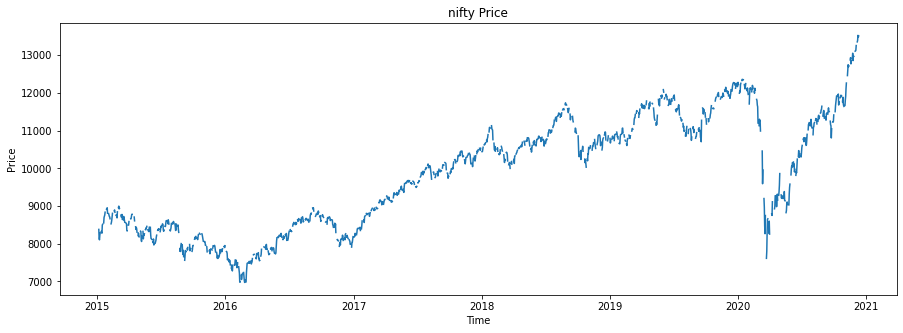

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nifty_data['Date'],nifty_data['Close'])
plt.title('nifty Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

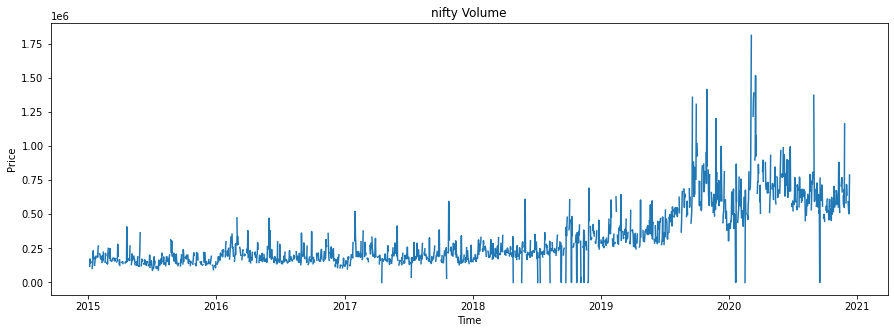

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nifty_data['Date'],nifty_data['Volume'])
plt.title('nifty Volume')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

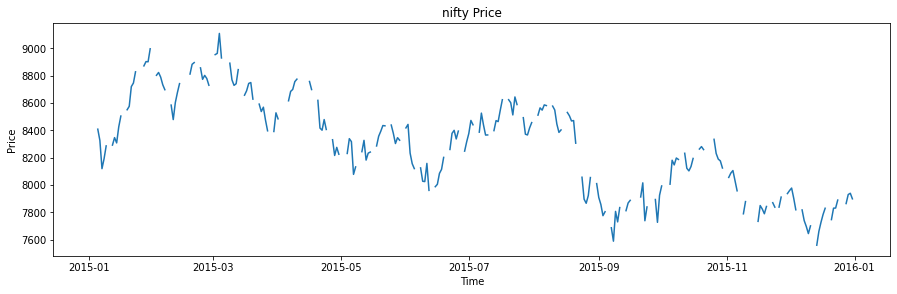

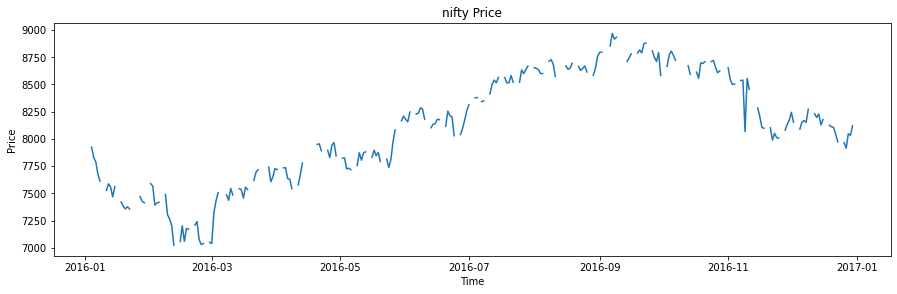

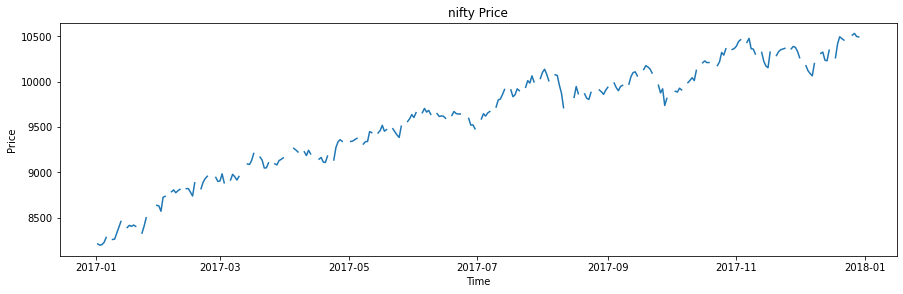

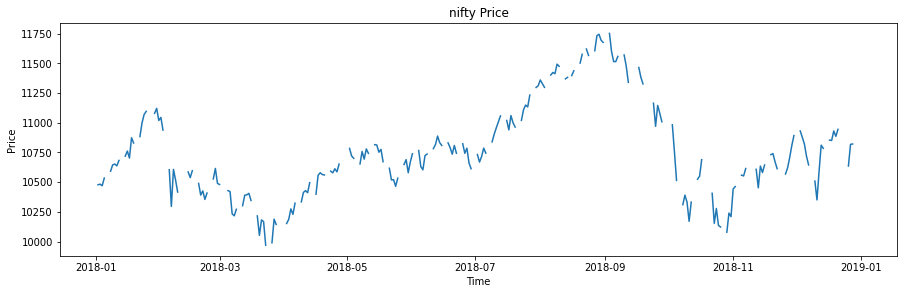

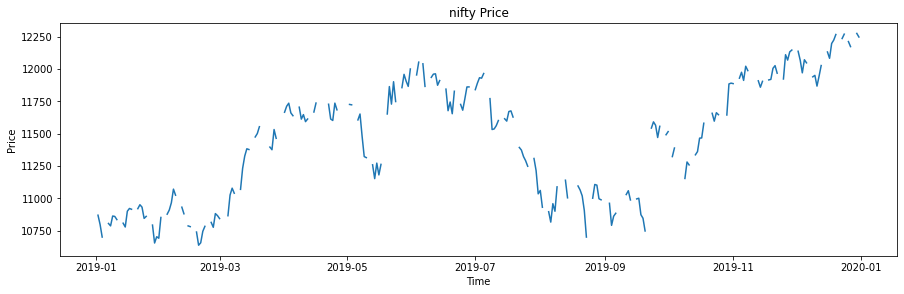

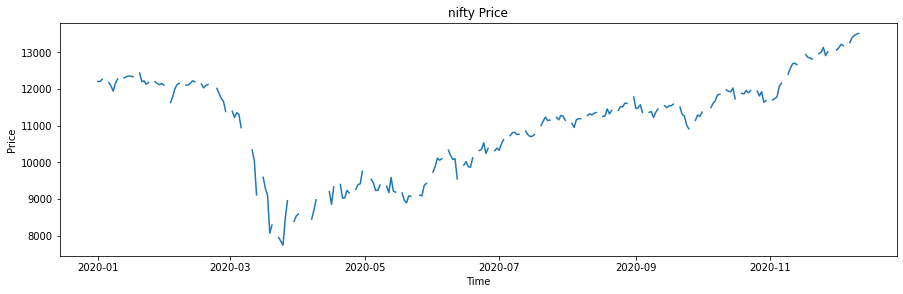

In [ ]:
plt.rcParams["figure.figsize"] = (15,30)
for i in range(6):
  plt.subplot(6, 1, i+1)
  plt.plot(nifty_data[str(i+2015)+'-01-01':str(i+2015)+'-12-31']['Date'],nifty_data[str(i+2015)+'-01-01':str(i+2015)+'-12-31']['Open'])
  plt.title('nifty Price')
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.show()

### Correlation Between Price and Volume

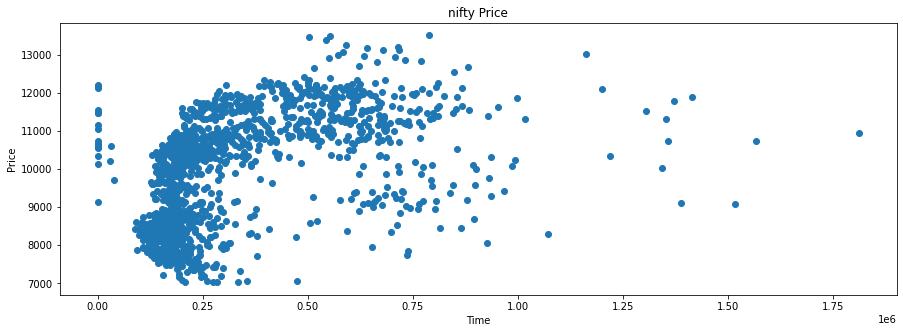

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nifty_data['Volume'],nifty_data['Open'])
plt.title('nifty Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

We can say that as market volume increased, the nifty Volatality also increased

### Importing News Dataset

In [ ]:
news = pd.read_csv('/content/drive/MyDrive/DataVis Data/abcnews-date-text.csv')

### Preprocessing News Data

In [ ]:
news.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
news.rename(columns={'publish_date':'Date','headline_text':'Headline'},inplace=True)
news.head()

,Date,Headline
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
news.dtypes

Date         int64
Headline    object
dtype: object

In [ ]:
#Converts float to Date
news['Date']=pd.to_datetime(news['Date'],format='%Y%m%d')
news.dtypes

Date        datetime64[ns]
Headline            object
dtype: object

In [ ]:
news.head()

,Date,Headline
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [ ]:
news.set_index('Date',inplace=True)
news = news['2015-01-01':'2020-12-31']
news.head()

,Headline
Date,
2015-01-01,1000s celebrate nye in adelaide
2015-01-01,1984 qld cabinet papers released
2015-01-01,2014 year in interactive storytelling
2015-01-01,35 dead in shanghai new year stampede
2015-01-01,airasia qz8501 first two bodies arrive in sura...


### Finding News Polarity

In [ ]:
#Vader Algoritm
blobs = [TextBlob(news['Headline'][i]) for i in tqdm(range(news.shape[0]))]
polarity = [blob.polarity for blob in tqdm(blobs)]

100%|██████████| 300778/300778 [00:51<00:00, 5869.02it/s]


In [ ]:
news['Polarity'] = polarity

In [ ]:
news.head()

,Headline,Polarity
Date,,
2015-01-01,1000s celebrate nye in adelaide,0.000000
2015-01-01,1984 qld cabinet papers released,0.000000
2015-01-01,2014 year in interactive storytelling,0.000000
2015-01-01,35 dead in shanghai new year stampede,-0.031818
2015-01-01,airasia qz8501 first two bodies arrive in sura...,0.250000


### Grouping News Data by Date and finding mean Polarity

In [ ]:
news_polarities=news.groupby('Date').mean()
news_polarities.tail()

,Polarity
Date,
2020-12-27,-0.007455
2020-12-28,0.023704
2020-12-29,0.009022
2020-12-30,0.049853
2020-12-31,0.044833


### Normalizing nifty Data


In [ ]:
nifty_data_2015 = nifty_data['2015-01-01':'2015-12-31']
nifty_data_2016 = nifty_data['2016-01-01':'2016-12-31']
nifty_data_2017 = nifty_data['2017-01-01':'2017-12-31']
nifty_data_2018 = nifty_data['2018-01-01':'2018-12-31']
nifty_data_2019 = nifty_data['2019-01-01':'2019-12-31']
nifty_data_2020 = nifty_data['2020-01-01':'2020-12-31']

In [ ]:
#To DO: Find for 2016 to 2020
nifty_data_2015['Open Normalized'] = (nifty_data_2015['Open'] - nifty_data_2015['Open'].mean())/(nifty_data_2015['Open'].std())
nifty_data_2016['Open Normalized'] = (nifty_data_2016['Open'] - nifty_data_2016['Open'].mean())/(nifty_data_2016['Open'].std())
nifty_data_2017['Open Normalized'] = (nifty_data_2017['Open'] - nifty_data_2017['Open'].mean())/(nifty_data_2017['Open'].std())
nifty_data_2018['Open Normalized'] = (nifty_data_2018['Open'] - nifty_data_2018['Open'].mean())/(nifty_data_2018['Open'].std())
nifty_data_2019['Open Normalized'] = (nifty_data_2019['Open'] - nifty_data_2019['Open'].mean())/(nifty_data_2019['Open'].std())
nifty_data_2020['Open Normalized'] = (nifty_data_2020['Open'] - nifty_data_2020['Open'].mean())/(nifty_data_2020['Open'].std())

In [ ]:
#To DO: Find for 2016 to 2020
nifty_data_2015['Volume Normalized'] = (nifty_data_2015['Volume'] - nifty_data_2015['Volume'].mean())/(nifty_data_2015['Volume'].std())
nifty_data_2016['Volume Normalized'] = (nifty_data_2016['Volume'] - nifty_data_2016['Volume'].mean())/(nifty_data_2016['Volume'].std())
nifty_data_2017['Volume Normalized'] = (nifty_data_2017['Volume'] - nifty_data_2017['Volume'].mean())/(nifty_data_2017['Volume'].std())
nifty_data_2018['Volume Normalized'] = (nifty_data_2018['Volume'] - nifty_data_2018['Volume'].mean())/(nifty_data_2018['Volume'].std())
nifty_data_2019['Volume Normalized'] = (nifty_data_2019['Volume'] - nifty_data_2019['Volume'].mean())/(nifty_data_2019['Volume'].std())
nifty_data_2020['Volume Normalized'] = (nifty_data_2020['Volume'] - nifty_data_2020['Volume'].mean())/(nifty_data_2020['Volume'].std())

### Normalizing News Polarities

In [ ]:
news_polarities = (news_polarities - news_polarities.mean())/(news_polarities.std())
news_p = news_polarities.reset_index()
news_p.head()

,Date,Polarity
0,2015-01-01,0.486202
1,2015-01-02,0.525448
2,2015-01-03,-0.125111
3,2015-01-04,-0.701990
4,2015-01-05,-0.720196


### Plotting Polarity Vs Price (Normalized)

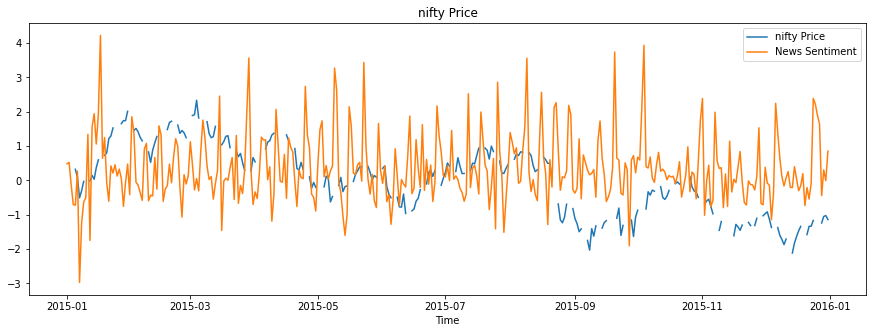

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nifty_data_2015['Date'],nifty_data_2015['Open Normalized'], label='nifty Price')
plt.plot(news_polarities['2015-01-01':'2015-12-31'], label='News Sentiment')
plt.title('nifty Price')
plt.xlabel('Time')
plt.legend()
plt.show()

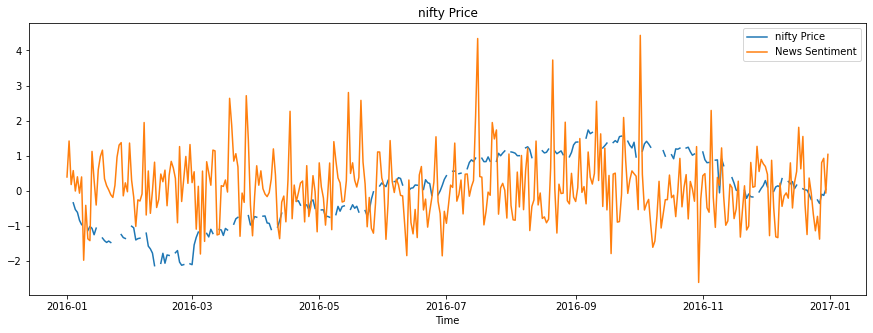

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nifty_data_2016['Date'],nifty_data_2016['Open Normalized'], label='nifty Price')
plt.plot(news_polarities['2016-01-01':'2016-12-31'], label='News Sentiment')
plt.title('nifty Price')
plt.xlabel('Time')
plt.legend()
plt.show()

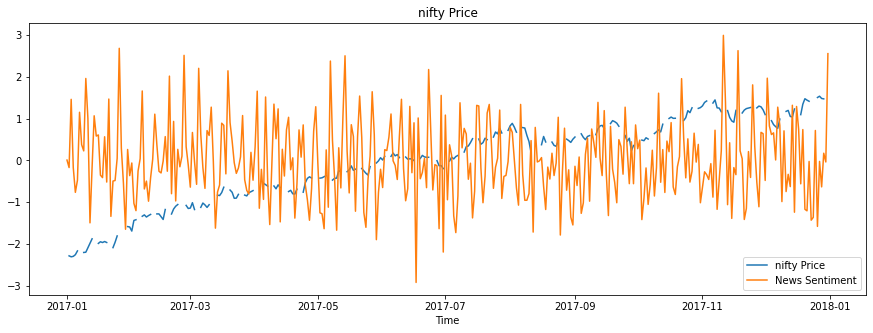

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nifty_data_2017['Date'],nifty_data_2017['Open Normalized'], label='nifty Price')
plt.plot(news_polarities['2017-01-01':'2017-12-31'], label='News Sentiment')
plt.title('nifty Price')
plt.xlabel('Time')
plt.legend()
plt.show()

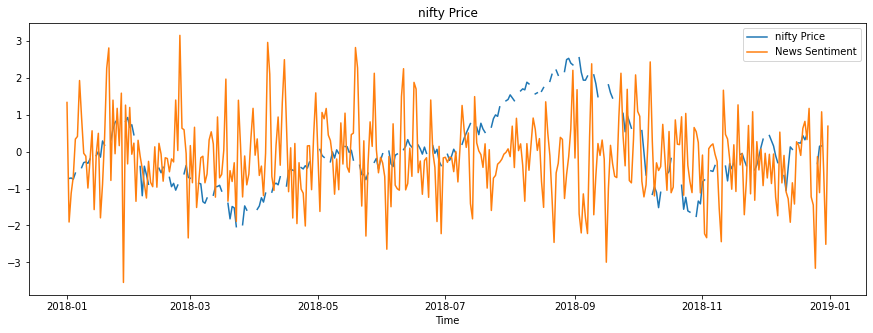

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nifty_data_2018['Date'],nifty_data_2018['Open Normalized'], label='nifty Price')
plt.plot(news_polarities['2018-01-01':'2018-12-31'], label='News Sentiment')
plt.title('nifty Price')
plt.xlabel('Time')
plt.legend()
plt.show()

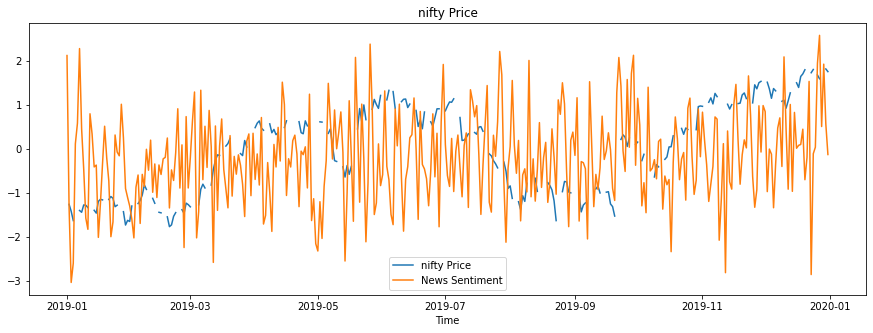

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nifty_data_2019['Date'],nifty_data_2019['Open Normalized'], label='nifty Price')
plt.plot(news_polarities['2019-01-01':'2019-12-31'], label='News Sentiment')
plt.title('nifty Price')
plt.xlabel('Time')
plt.legend()
plt.show()

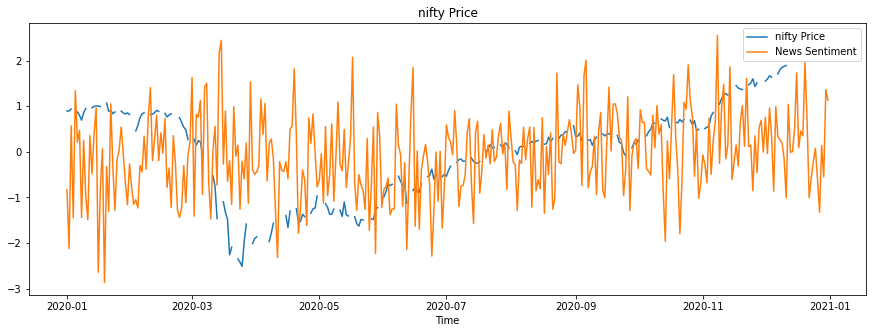

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nifty_data_2020['Date'],nifty_data_2020['Open Normalized'], label='nifty Price')
plt.plot(news_polarities['2020-01-01':'2020-12-31'], label='News Sentiment')
plt.title('nifty Price')
plt.xlabel('Time')
plt.legend()
plt.show()

### Scatter Plot for Polarity vs Price

In [ ]:
nifty_data_2015.shape

(365, 9)

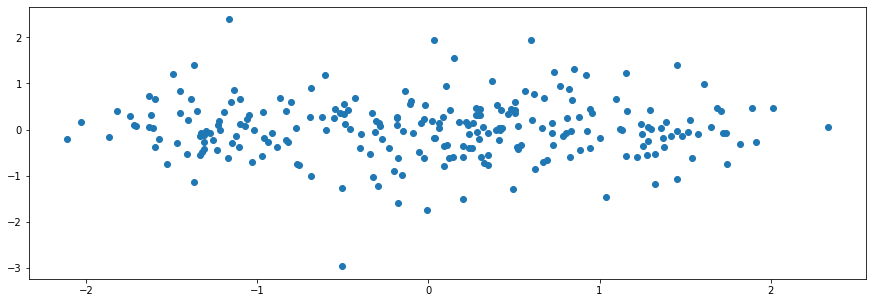

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nifty_data_2015['Open Normalized'], news_polarities['2015-01-01':'2015-12-31'])
plt.show()

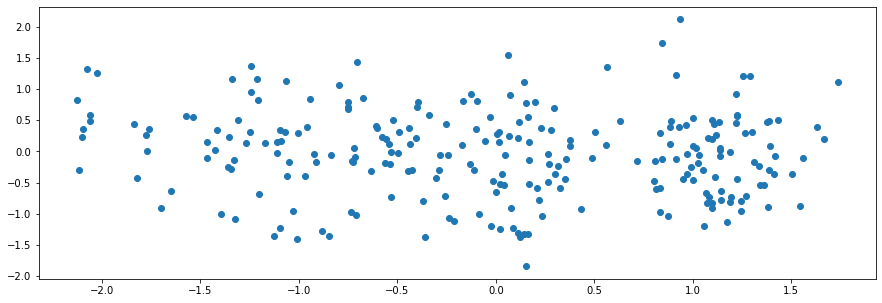

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nifty_data_2016['Open Normalized'], news_polarities['2016-01-01':'2016-12-31'])
plt.show()

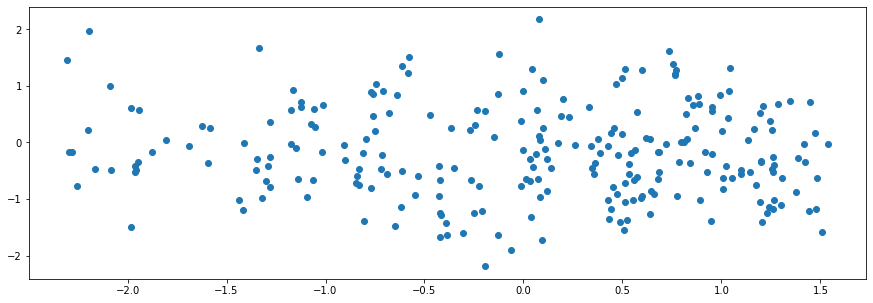

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nifty_data_2017['Open Normalized'], news_polarities['2017-01-01':'2017-12-31'])
plt.show()

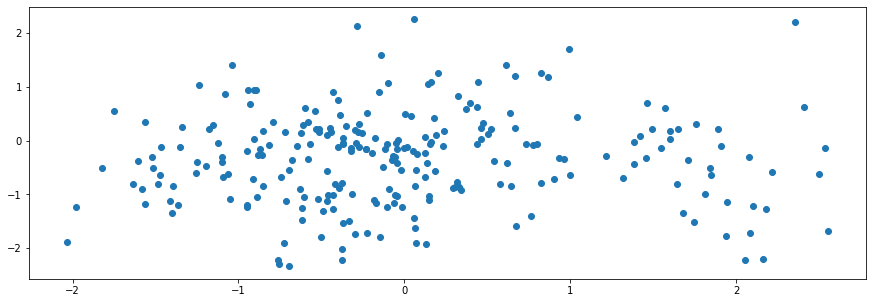

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nifty_data_2018['Open Normalized'], news_polarities['2018-01-01':'2018-12-31'])
plt.show()

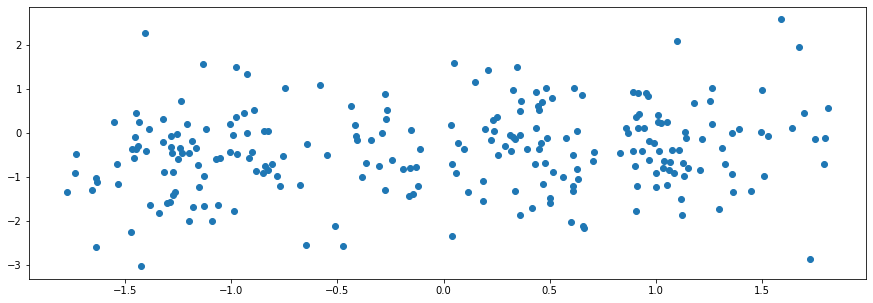

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nifty_data_2019['Open Normalized'], news_polarities['2019-01-01':'2019-12-31'])
plt.show()

### Polarity vs Volume

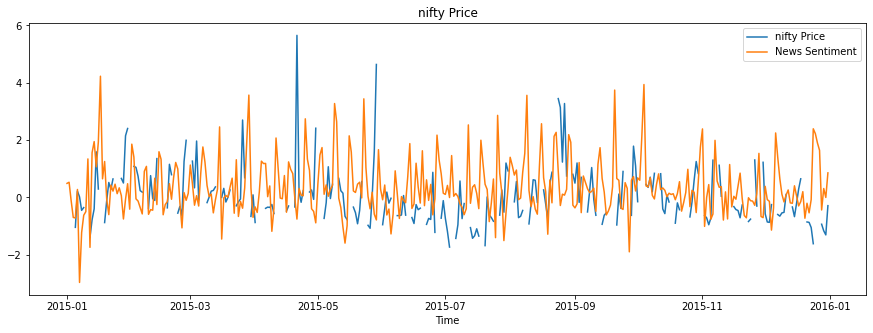

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nifty_data_2015['Date'],nifty_data_2015['Volume Normalized'], label='nifty Price')
plt.plot(news_polarities['2015-01-01':'2015-12-31'], label='News Sentiment')
plt.title('nifty Price')
plt.xlabel('Time')
plt.legend()
plt.show()

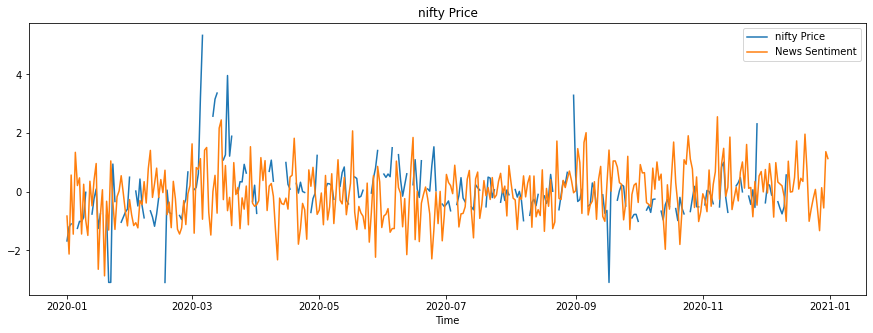

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nifty_data_2020['Date'],nifty_data_2020['Volume Normalized'], label='nifty Price')
plt.plot(news_polarities['2020-01-01':'2020-12-31'], label='News Sentiment')
plt.title('nifty Price')
plt.xlabel('Time')
plt.legend()
plt.show()

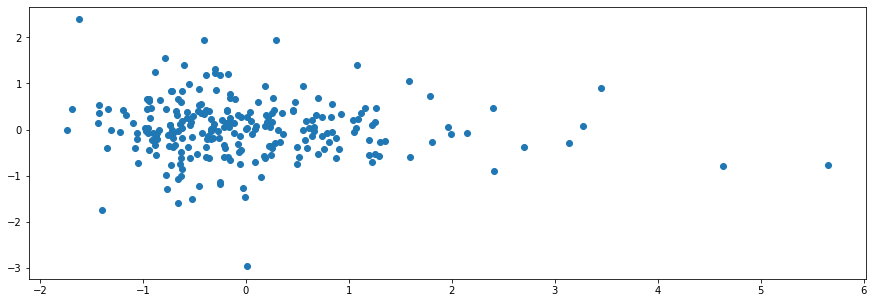

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nifty_data_2015['Volume Normalized'], news_polarities['2015-01-01':'2015-12-31'])
plt.show()

In [ ]:
nifty_data_2020['Open Normalized'].fillna(nifty_data_2020['Open Normalized'].mean(),inplace=True)
nifty_data_2020['Volume Normalized'].fillna(nifty_data_2020['Volume Normalized'].mean(),inplace=True)

In [ ]:
nifty_data_2015['Open Normalized'].fillna(nifty_data_2015['Open Normalized'].mean(),inplace=True)
nifty_data_2015['Volume Normalized'].fillna(nifty_data_2015['Volume Normalized'].mean(),inplace=True)

In [ ]:
nifty_data_2017['Open Normalized'].fillna(nifty_data_2017['Open Normalized'].mean(),inplace=True)
nifty_data_2017['Volume Normalized'].fillna(nifty_data_2017['Volume Normalized'].mean(),inplace=True)

In [ ]:
nifty_data_2018['Open Normalized'].fillna(nifty_data_2018['Open Normalized'].mean(),inplace=True)
nifty_data_2018['Volume Normalized'].fillna(nifty_data_2018['Volume Normalized'].mean(),inplace=True)

In [ ]:
nifty_data_2019['Open Normalized'].fillna(nifty_data_2019['Open Normalized'].mean(),inplace=True)
nifty_data_2019['Volume Normalized'].fillna(nifty_data_2019['Volume Normalized'].mean(),inplace=True)

### Covarieance Volume and Sentiment

In [ ]:
scipy.stats.pearsonr(news_polarities['2015-01-01':'2015-12-31'].to_numpy().reshape(365,), nifty_data_2015['Volume Normalized'].to_numpy().reshape(365,))

(-0.04074990852274666, 0.43764391501365935)

In [ ]:
scipy.stats.pearsonr(news_polarities['2017-01-01':'2017-12-31'].to_numpy().reshape(365,), nifty_data_2017['Volume Normalized'].to_numpy().reshape(365,))

(0.022897864500454217, 0.6628224122194379)

In [ ]:
scipy.stats.pearsonr(news_polarities['2018-01-01':'2018-12-31'].to_numpy().reshape(365,), nifty_data_2018['Volume Normalized'].to_numpy().reshape(365,))

(-0.03734747388018474, 0.4768839419354077)

In [ ]:
scipy.stats.pearsonr(news_polarities['2019-01-01':'2019-12-31'].to_numpy().reshape(365,), nifty_data_2019['Volume Normalized'].to_numpy().reshape(365,))

(0.08629514144062954, 0.09974662091264963)

### Covarience Price and Sentiment

In [ ]:
scipy.stats.pearsonr(news_polarities['2015-01-01':'2015-12-31'].to_numpy().reshape(365,), nifty_data_2015['Open Normalized'].to_numpy().reshape(365,))

(-0.0052199485831213805, 0.9208321279765213)

In [ ]:
scipy.stats.pearsonr(news_polarities['2017-01-01':'2017-12-31'].to_numpy().reshape(365,), nifty_data_2017['Open Normalized'].to_numpy().reshape(365,))

(-0.049584154571724194, 0.34484484634454454)

In [ ]:
scipy.stats.pearsonr(news_polarities['2018-01-01':'2018-12-31'].to_numpy().reshape(365,), nifty_data_2018['Open Normalized'].to_numpy().reshape(365,))

(0.02120727621752379, 0.6863449981487696)

In [ ]:
scipy.stats.pearsonr(news_polarities['2019-01-01':'2019-12-31'].to_numpy().reshape(365,), nifty_data_2019['Open Normalized'].to_numpy().reshape(365,))

(0.12168477154169957, 0.020047485332186227)

## Conclusion

As the impact of social media and internet is increasing, so is the dependance of Crypto Market is increasing on News

### Prediction Model with LTSM and RNN